# Import libraries and read data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing

In [2]:
data = pd.read_csv("a1_b1_c1.csv")
# data = pd.read_csv("a1_b1_c2.csv")
# data = pd.read_csv("a1_b2_c1.csv")
# data = pd.read_csv("a1_b2_c2.csv")

# data = pd.read_csv("a1_b1_c1_d1.csv")
# data = pd.read_csv("a1_b1_c2_d1.csv")
# data = pd.read_csv("a1_b2_c2_d1.csv")

# Train test split

In [3]:
# fix random seed for reproducibility
np.random.seed(7)

# split into input (X) and output (Y) variables
X = data.iloc[:,data.columns != 'isFraud']
Y = data['isFraud']
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

#scaling to around -2 to 2 (Z)
scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Prediction with SVM

Train Accuracy score: 0.98000
Train ROC score: 0.96970
Test Accuracy score: 0.97750
Test ROC score: 0.96154


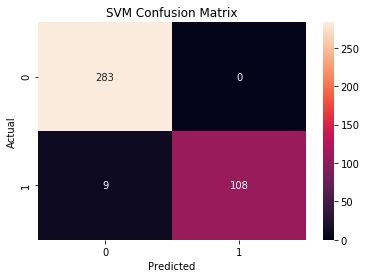

Stored 'confuse_svm' (ndarray)


In [4]:
clf = svm.SVC(C=0.01, degree=0, gamma=0.05, kernel='linear', random_state=1)
clf.fit(scaled_X_train, y_train)

# Predict train set
y_pred_train = clf.predict(scaled_X_train)
acc_train = accuracy_score(y_train, y_pred_train)
roc_train = roc_auc_score(y_train, y_pred_train)
print('Train Accuracy score: {0:0.5f}' .format(acc_train))
print('Train ROC score: {0:0.5f}' .format(roc_train))

# Predict test set
y_pred_test = clf.predict(scaled_X_test)
acc_test = accuracy_score(y_test, y_pred_test)
roc_test = roc_auc_score(y_test, y_pred_test)
print('Test Accuracy score: {0:0.5f}' .format(acc_test))
print('Test ROC score: {0:0.5f}' .format(roc_test))

# Plot confusion matrix for test
confuse_svm = confusion_matrix(y_test, y_pred_test)
confuse_svm
fig = plt.figure()
sns.heatmap(confuse_svm, annot = True, fmt='d')
plt.title("SVM Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# store best results for svm
%store confuse_svm

# GridSearchCV

In [5]:
%%time

from sklearn.model_selection import GridSearchCV

# Define hyperparameters and grid search
param_grid = { 
    'C': [0.01, 0.03, 0.05, 0.07, 0.1],
    'gamma' : [0.05, 0.1, 0.15, 0.2],
    'degree' : [0, 1, 2, 3, 4, 5],
    'kernel' : ['linear', 'poly'],
}

grid_search = GridSearchCV(svm.SVC(random_state=1), param_grid, cv=10)
grid_search.fit(scaled_X_train, y_train)
grid_search.best_params_

CPU times: user 4.43 s, sys: 31.4 ms, total: 4.46 s
Wall time: 4.46 s


In [6]:
# Get best score
grid_search.best_score_

0.9800000000000001

In [7]:
# Get best parameters
grid_search.best_params_

{'C': 0.01, 'degree': 0, 'gamma': 0.05, 'kernel': 'linear'}

In [8]:
# Store search results in df
df = pd.DataFrame(grid_search.cv_results_)
df.sort_values(by=['rank_test_score'], inplace=True)
df.head(50)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001313,0.000632,0.000409,0.000129,0.01,0,0.05,linear,"{'C': 0.01, 'degree': 0, 'gamma': 0.05, 'kerne...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.04,1
157,0.001027,0.000011,0.000368,0.000019,0.07,1,0.15,poly,"{'C': 0.07, 'degree': 1, 'gamma': 0.15, 'kerne...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.04,1
94,0.001073,0.000048,0.000371,0.000024,0.03,5,0.2,linear,"{'C': 0.03, 'degree': 5, 'gamma': 0.2, 'kernel...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.04,1
158,0.001007,0.000040,0.000358,0.000015,0.07,1,0.2,linear,"{'C': 0.07, 'degree': 1, 'gamma': 0.2, 'kernel...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.04,1
92,0.001351,0.000286,0.000474,0.000095,0.03,5,0.15,linear,"{'C': 0.03, 'degree': 5, 'gamma': 0.15, 'kerne...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.04,1
159,0.001016,0.000009,0.000361,0.000013,0.07,1,0.2,poly,"{'C': 0.07, 'degree': 1, 'gamma': 0.2, 'kernel...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.04,1
90,0.001045,0.000026,0.000359,0.000009,0.03,5,0.1,linear,"{'C': 0.03, 'degree': 5, 'gamma': 0.1, 'kernel...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.04,1
160,0.001004,0.000033,0.000355,0.000021,0.07,2,0.05,linear,"{'C': 0.07, 'degree': 2, 'gamma': 0.05, 'kerne...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.04,1
88,0.001062,0.000042,0.000373,0.000028,0.03,5,0.05,linear,"{'C': 0.03, 'degree': 5, 'gamma': 0.05, 'kerne...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.04,1
162,0.001021,0.000046,0.000354,0.000014,0.07,2,0.1,linear,"{'C': 0.07, 'degree': 2, 'gamma': 0.1, 'kernel...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.04,1


In [10]:
# save search results to csv
df.to_csv('SVM_cv_result_2.csv')